<a href="https://colab.research.google.com/github/baraa-hakawati/Car-Insurance-Claim-Analysis/blob/main/Belt_Exam_Intermediate_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intermediate Machine Learining: Third Cohort Exam.**
Baraa A. Hakawati

# **PART 1: CLUSTERING**

 ## **Data Loading and Inspection.**

### **Import Required Packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **General Overview**

In [ ]:
# Read the dataset
path = '/content/drive/MyDrive/AXSOSACADEMY/03-DataEnrichment/loan_cluster_df.csv'
df = pd.read_csv(path)
# General info about the dataset
df.info()
# Display first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19438 entries, 0 to 19437
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Income             19438 non-null  int64
 1   Age                19438 non-null  int64
 2   Experience         19438 non-null  int64
 3   Married            19438 non-null  int64
 4   Owns_House         19438 non-null  int64
 5   Owns_Car           19438 non-null  int64
 6   CURRENT_JOB_YRS    19438 non-null  int64
 7   CURRENT_HOUSE_YRS  19438 non-null  int64
 8   Risk_Flag          19438 non-null  int64
dtypes: int64(9)
memory usage: 1.3 MB


,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,3635824,56,8,0,0,0,8,13,1
1,3231341,47,6,1,0,0,6,14,0
2,7430695,59,8,0,0,0,8,10,0
3,8688710,47,1,0,0,0,1,10,0
4,2229190,21,11,0,0,0,9,11,0


In [ ]:
# Display the number of rows and columns within the dataset
print(f"The number of records within the dataset (rows) is : {df.shape[0]}")
print(f"The mumber of features within the dataset (columns) is: {df.shape[1]}")

The number of records within the dataset (rows) is : 19438
The mumber of features within the dataset (columns) is: 9


### **Missing Values**

In [ ]:
# Identify missing values
print("\nMissing values in each feature are:")
df.isnull().sum()


Missing values in each feature are:


,0
Income,0
Age,0
Experience,0
Married,0
Owns_House,0
Owns_Car,0
CURRENT_JOB_YRS,0
CURRENT_HOUSE_YRS,0
Risk_Flag,0


### **Data duplication**

In [ ]:
# Check whether duplicates are included within the data
print(f"\nThere are {df.duplicated().sum()} duplicated records within the data")


There are 10463 duplicated records within the data


In [ ]:
# Removing duplicated records.
df = df.drop_duplicates()
print(f"\nThere are {df.duplicated().sum()} duplicated records within the data")


There are 0 duplicated records within the data


### **Unusual Data Points Identification**

In [ ]:
df.describe() # Display the overall stats for each feature to determine unusual data points.

,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,8.975000e+03,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000
mean,5.014217e+06,50.015822,10.037214,0.102173,0.053816,0.301616,6.328022,12.004568,0.166462
std,2.883422e+06,16.973700,6.002911,0.302892,0.225667,0.458985,3.639975,1.406265,0.372516
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.521816e+06,35.000000,5.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5.003243e+06,50.000000,10.000000,0.000000,0.000000,0.000000,6.000000,12.000000,0.000000
75%,7.497723e+06,65.000000,15.000000,0.000000,0.000000,1.000000,9.000000,13.000000,0.000000
max,9.999180e+06,79.000000,20.000000,1.000000,1.000000,1.000000,14.000000,14.000000,1.000000


## **Data Modeling**

In [ ]:
# First, we have to drop the target column for clustering.......
X = df.drop(columns=['Risk_Flag'])

In [ ]:
# Now, let's standardize the features.........
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# As required, let's determine the optimal clusters using Elbow and Silhouette methods..................
inertia = []
silhouette_scores = []
K_range = range(2, 11)

In [ ]:
# Let's looping together :) ..............
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

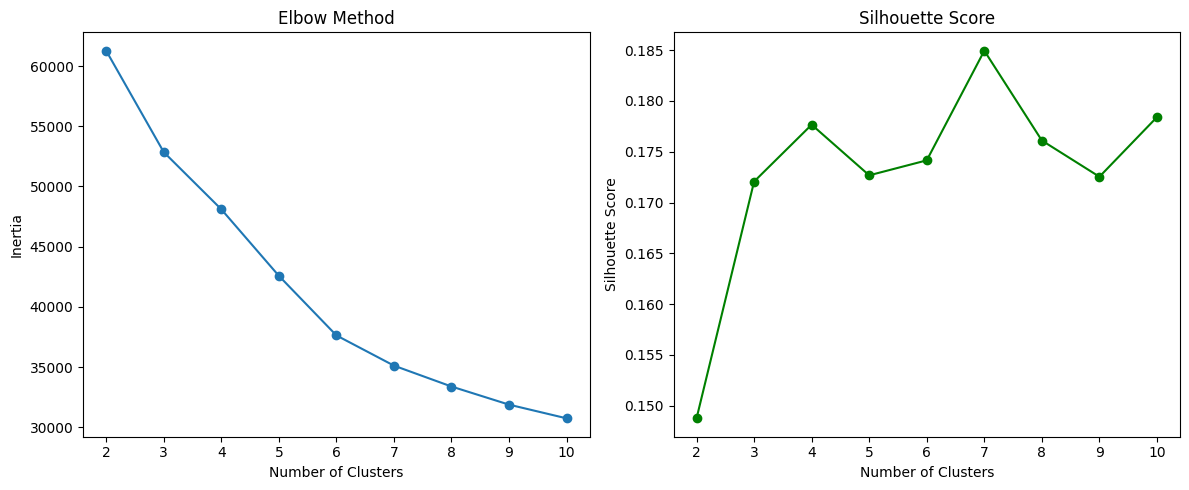

In [ ]:
# Let's plotting Elbow and Silhouette dude...........
plt.figure(figsize=(12, 5)) # Our cancas :)
# Elbow Method'
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
# Display.............
plt.tight_layout()
plt.show()

In [ ]:
# We Choose our optimal number of clusters k=3 according to Elbow method :)...........
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Let's analyze the clusters mate :)......
cluster_summary = df.groupby('Cluster').mean().round(2)
cluster_summary

,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Cluster,,,,,,,,,
0,5082334.23,51.23,10.46,0.08,1.0,0.29,6.56,12.11,0.17
1,5015496.53,49.76,14.49,0.10,0.0,0.30,8.60,12.01,0.16
2,5003985.38,50.18,4.49,0.10,0.0,0.30,3.50,11.99,0.17


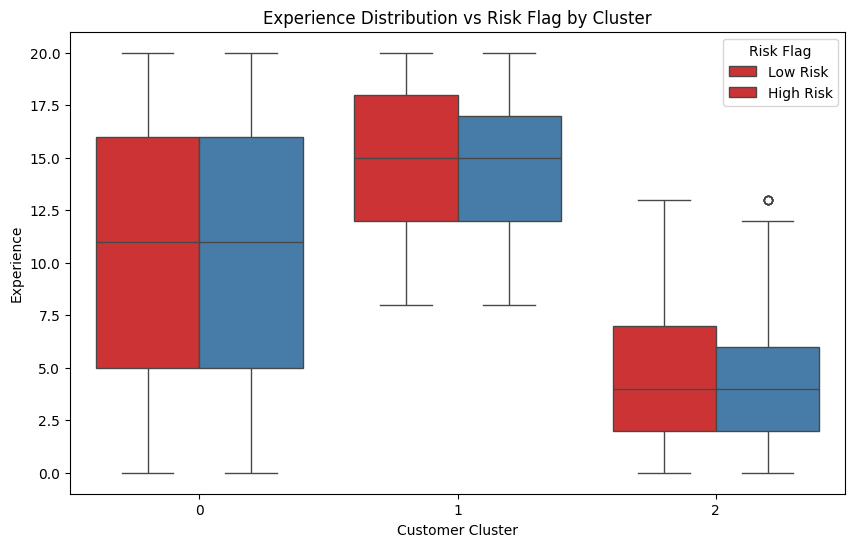

In [26]:
plt.figure(figsize=(10, 6))
# Create our boxplot
sns.boxplot(data=df, x='Cluster', y='Experience', hue='Risk_Flag', palette='Set1')
plt.title('Experience Distribution vs Risk Flag by Cluster')
plt.xlabel('Customer Cluster')
plt.ylabel('Experience')
plt.legend(title='Risk Flag', labels=['Low Risk', 'High Risk'])
plt.show()

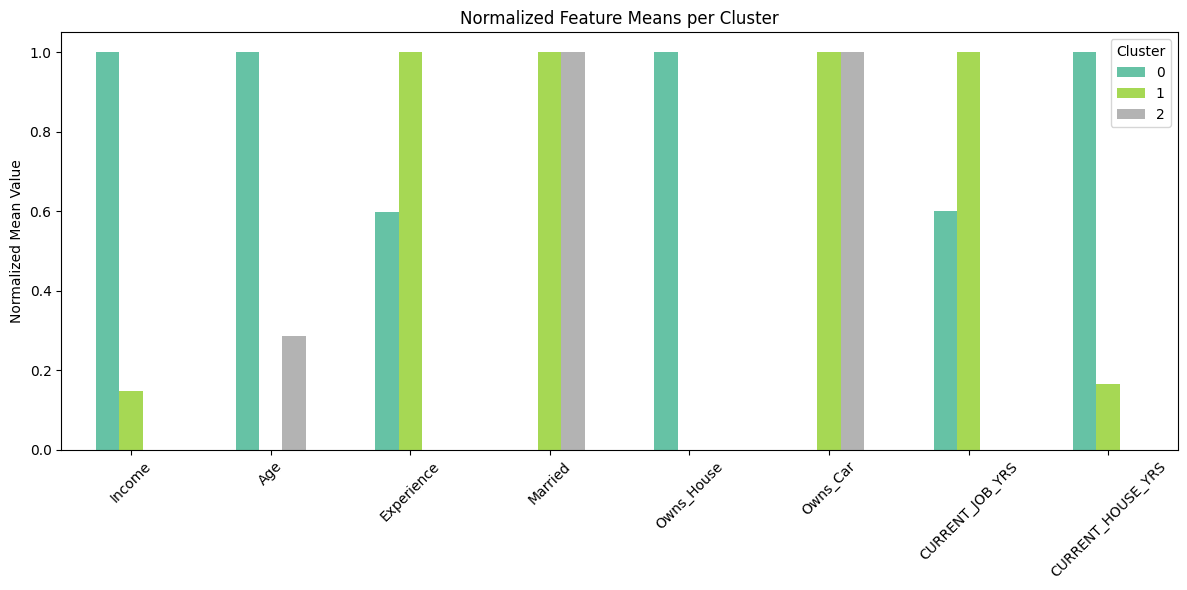

In [ ]:
# Visualization 2: Normalized feature means per cluster
normalized_means = cluster_summary.drop(columns='Risk_Flag').apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalized_means.T.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Normalized Feature Means per Cluster')
plt.ylabel('Normalized Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Conclusion**

### **Data Exploration and Preparation**

The dataset we have consists of 8,975 unique records after cleaning, each one representing a customer with various financial and demographic attributes. During the data cleaning stage, 10,463 duplicate records where deticted, which were removed to ensure meaningful clustering. The features include income, age, experience, marital status, home and car ownership, years in current job, and years in current house, along with the risk flag.

### **Determining Optimal Clusters**

- **Elbow Method:** The Elbow Method was used to evaluate the inertia (i.e total intra-cluster variance). The optimal number of clusters was determined at k = 3, where the distortion curve bends significantly at this level.
- **Silhouette Score:** The Silhouette Score was also computed for different values of k=7. However, a k=3 was chosen based on the Elbow Method, which focuses on minimizing within-cluster variance while balancing interpretability, while k=7 may optimize cluster separation, the choice of k=3 likely prioritizes simplicity and practical application for the bank's decision-making.

### **Cluster Interpretation and Analysis**

Each cluster represents a distinct customer profile based on income, age, experience, and other attributes, so let's illustrate each one:
- **Cluster 0:** Homeowners with Moderate Financial Stability

This cluster is mostly homeowners with stable incomes and moderate financial risk. For insrance:

  - Income: 5,082,334.23
  - Age: 51.23 years
  - Experience: 10.46 years
  - Home Ownership: Mostly homeowners
  - Car Ownership: Moderate proportion own cars
  - Job Tenure: ~6.56 years
  - Loan Risk: Moderate risk (0.17)

- **Cluster 1:** Financially Stable Non-Homeowners

This cluster experienced professionals who rent but have strong financial stability. For insrance:

  - Income: 5,015,496.53
  - Age: 49.76 years
  - Experience: 14.49 years
  - Home Ownership: Mostly renters
  - Car Ownership: Similar car ownership levels as Cluster 0
  - Job Tenure: ~8.60 years
  - Loan Risk: Moderate risk (0.16)

- **Cluster 2:** Low-Experience, Young Earners

This cluster represrnts the young earners with low experience and shorter job tenure, indicating potential financial volatility. For insrance:

  - Income: 5,003,985.38
  - Age: 50.18 years
  - Experience: 4.49 years
  - Home Ownership: Few homeowners
  - Car Ownership: Similar levels to Cluster 0 and 1
  - Job Tenure: ~3.50 years
  - Loan Risk: Moderate risk (0.17)

### **Visualizations and Their Interpretation**

- **Visualization 1:** Experience Distribution vs Risk Flag by Cluster

The box plot shows that experience alone does not strongly correlate with loan risk, as both high-risk and low-risk customers at some what have a slightly similar experience distributions across clusters. Cluster 1 tends to have higher experience, while Cluster 2 has more early-career individuals, but risk levels remain mixed within each group. This suggests that other factors—such as income, financial habits, and job tenure coukd play a larger role in determining loan risk rather than just years of experience.

- **Visualization 2:** Normalized Feature Means per Cluster
  - This bar chart compares clusters across all features in a standardized format.
  - Cluster 0 shows strong homeownership, indicating stability.
  - Cluster 1 exhibits high experience levels but fewer homeowners, potentially representing customers who prioritize mobility over homeownership.
  - Cluster 2 significantly differs in job tenure and experience, meaning they could be early-career individuals or frequent job changers.

# **PART 2**

 ## **Data Loading and Inspection.**

### **Import Required Packages**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### **General Overview**

In [31]:
# Read the dataset
path2 = '/content/drive/MyDrive/AXSOSACADEMY/03-DataEnrichment/loan_model_df.csv'
df2 = pd.read_csv(path2)
# General info about the dataset
df2.info()
# Display first 5 rows
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19438 entries, 0 to 19437
Columns: 406 entries, Income to STATE_West_Bengal
dtypes: int64(406)
memory usage: 60.2 MB


,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Air_traffic_controller,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,3635824,56,8,0,0,0,8,13,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3231341,47,6,1,0,0,6,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7430695,59,8,0,0,0,8,10,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8688710,47,1,0,0,0,1,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2229190,21,11,0,0,0,9,11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Display the number of rows and columns within the dataset
print(f"The number of records within the dataset (rows) is : {df2.shape[0]}")
print(f"The mumber of features within the dataset (columns) is: {df2.shape[1]}")

The number of records within the dataset (rows) is : 19438
The mumber of features within the dataset (columns) is: 406


### **Missing Values**

In [36]:
# Identify missing values
print("\nMissing values in all features are:")
df2.isnull().sum().sum()


Missing values in all features are:


np.int64(0)

## **Preprocessing**

In [38]:
target = "Risk_Flag"
X = df2.drop(columns=[target])  # Features
y = df2[target]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [47]:
# Model 1: Baseline Model..............
model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])
model_1.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
history1 = model_1.fit(X_train_pca, y_train, epochs=20, batch_size=32, validation_data=(X_test_pca, y_test))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


486/486 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8413 - loss: 0.4218 - val_accuracy: 0.8776 - val_loss: 0.3636
Epoch 2/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8768 - loss: 0.3426 - val_accuracy: 0.8783 - val_loss: 0.3552
Epoch 3/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8793 - loss: 0.3178 - val_accuracy: 0.8789 - val_loss: 0.3443
Epoch 4/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8788 - loss: 0.3017 - val_accuracy: 0.8768 - val_loss: 0.3468
Epoch 5/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8833 - loss: 0.2755 - val_accuracy: 0.8750 - val_loss: 0.3414
Epoch 6/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8960 - loss: 0.2456 - val_accuracy: 0.8696 - val_loss: 0.3398
Epoch 7/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8965 - loss: 0.2314 - val_accuracy: 0.8691 - val_loss: 0.3452
Epoch 8/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9051 - loss: 0.2139 - val_accuracy: 0.8727 - val_

In [48]:

# Evaluate Model 1
y_pred_1 = (model_1.predict(X_test_pca) > 0.5).astype("int32")
print(f"Baseline Model - Accuracy: {accuracy_score(y_test, y_pred_1):.4f}, Precision: {precision_score(y_test, y_pred_1):.4f}, Recall: {recall_score(y_test, y_pred_1):.4f}, F1-score: {f1_score(y_test, y_pred_1):.4f}")

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Baseline Model - Accuracy: 0.8783, Precision: 0.5029, Recall: 0.3684, F1-score: 0.4253


In [49]:
def plot_history(history, figsize=(6, 12), marker='o'):
    metrics_list = [c for c in history.history if not c.startswith('val_')]

    fig, axes = plt.subplots(nrows=len(metrics_list), figsize=figsize)

    if len(metrics_list) == 1:
        axes = [axes]  # Ensure axes are always iterable

    for i, metric_name in enumerate(metrics_list):
        ax = axes[i]
        ax.plot(history.epoch, history.history[metric_name], label=metric_name, marker=marker)

        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            ax.plot(history.epoch, history.history[val_metric_name], label=val_metric_name, marker=marker)

        ax.legend()
        ax.set_title(metric_name)

    fig.tight_layout()
    return fig, axes

(<Figure size 600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'loss'}>], dtype=object))

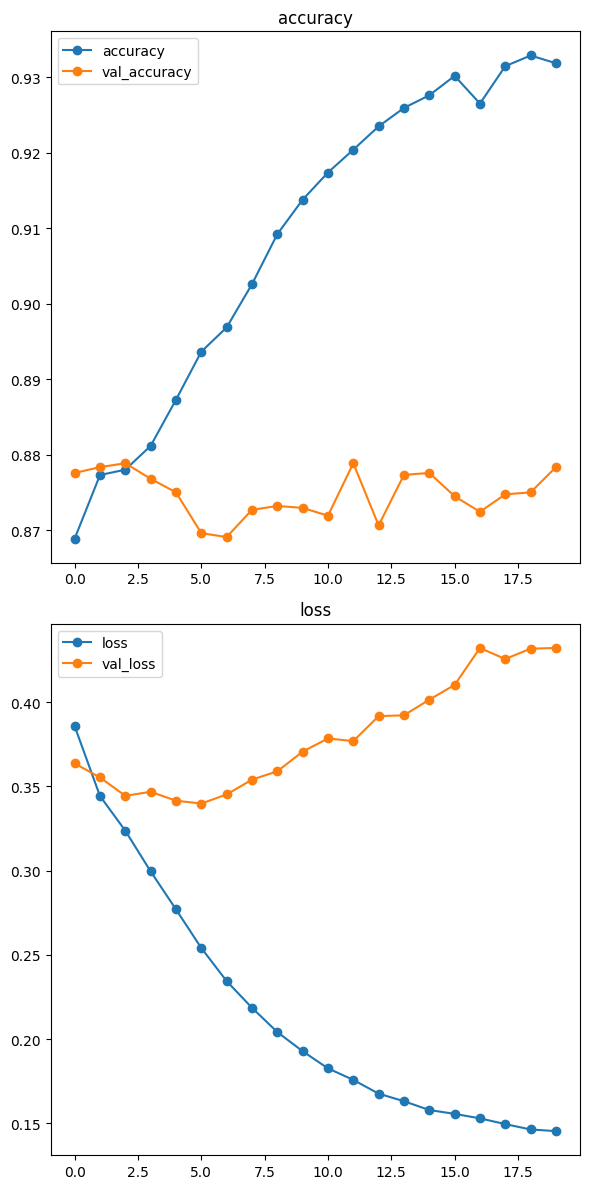

In [50]:
plot_history(history1)

In [51]:
# Model 2: Improved Model (More Layers & Dropout)
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_2.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
history2 = model_2.fit(X_train_pca, y_train, epochs=30, batch_size=32, validation_data=(X_test_pca, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8752 - loss: 0.3987 - val_accuracy: 0.8778 - val_loss: 0.3672
Epoch 2/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8720 - loss: 0.3724 - val_accuracy: 0.8778 - val_loss: 0.3611
Epoch 3/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8764 - loss: 0.3513 - val_accuracy: 0.8778 - val_loss: 0.3644
Epoch 4/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8752 - loss: 0.3472 - val_accuracy: 0.8768 - val_loss: 0.3666
Epoch 5/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8774 - loss: 0.3310 - val_accuracy: 0.8776 - val_loss: 0.3543
Epoch 6/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8731 - loss: 0.3327 - val_accuracy: 0.8765 - val_loss: 0.3525
Epoch 7/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8759 - loss: 0.3227 - val_accuracy: 0.8768 - val_loss: 0.3460
Epoch 8/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8825 - loss: 0.2976 - val_accuracy: 0

In [52]:
# Evaluate Model 2
y_pred_2 = (model_2.predict(X_test_pca) > 0.5).astype("int32")
print(f"Improved Model - Accuracy: {accuracy_score(y_test, y_pred_2):.4f}, Precision: {precision_score(y_test, y_pred_2):.4f}, Recall: {recall_score(y_test, y_pred_2):.4f}, F1-score: {f1_score(y_test, y_pred_2):.4f}")

122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Improved Model - Accuracy: 0.8760, Precision: 0.4929, Recall: 0.5137, F1-score: 0.5031


(<Figure size 600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'loss'}>], dtype=object))

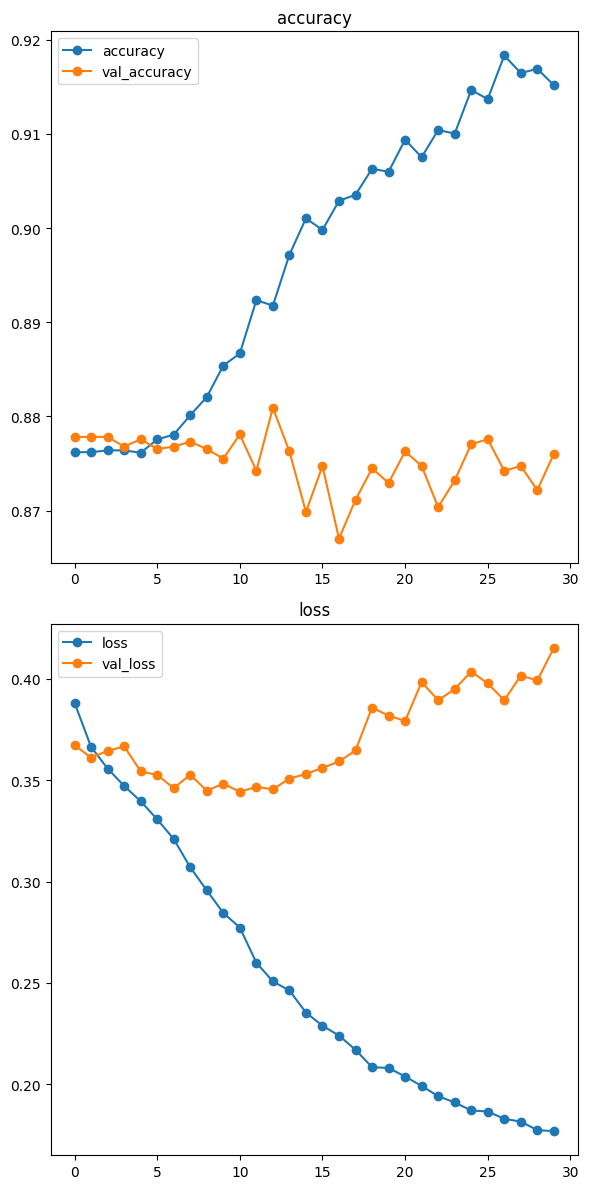

In [53]:
plot_history(history2)

In [54]:
# Model 3: Regularized Model (L2 Regularization)
from tensorflow.keras.regularizers import l2
model_3 = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_pca.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_3.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
history3 = model_3.fit(X_train_pca, y_train, epochs=30, batch_size=32, validation_data=(X_test_pca, y_test))

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


486/486 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8646 - loss: 0.6645 - val_accuracy: 0.8778 - val_loss: 0.5530
Epoch 2/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8778 - loss: 0.5287 - val_accuracy: 0.8778 - val_loss: 0.4851
Epoch 3/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8737 - loss: 0.4678 - val_accuracy: 0.8778 - val_loss: 0.4386
Epoch 4/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8785 - loss: 0.4169 - val_accuracy: 0.8778 - val_loss: 0.4201
Epoch 5/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8743 - loss: 0.4044 - val_accuracy: 0.8778 - val_loss: 0.4052
Epoch 6/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8811 - loss: 0.3742 - val_accuracy: 0.8778 - val_loss: 0.3986
Epoch 7/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8760 - loss: 0.3787 - val_accuracy: 0.8776 - val_loss: 0.4028
Epoch 8/30
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8789 - loss: 0.3625 - val_accuracy: 0.8801 - val_

In [55]:
# Evaluate Model 3
y_pred_3 = (model_3.predict(X_test_pca) > 0.5).astype("int32")
print(f"Regularized Model - Accuracy: {accuracy_score(y_test, y_pred_3):.4f}, Precision: {precision_score(y_test, y_pred_3):.4f}, Recall: {recall_score(y_test, y_pred_3):.4f}, F1-score: {f1_score(y_test, y_pred_3):.4f}")

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Regularized Model - Accuracy: 0.8791, Precision: 0.5098, Recall: 0.2737, F1-score: 0.3562


(<Figure size 600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'loss'}>], dtype=object))

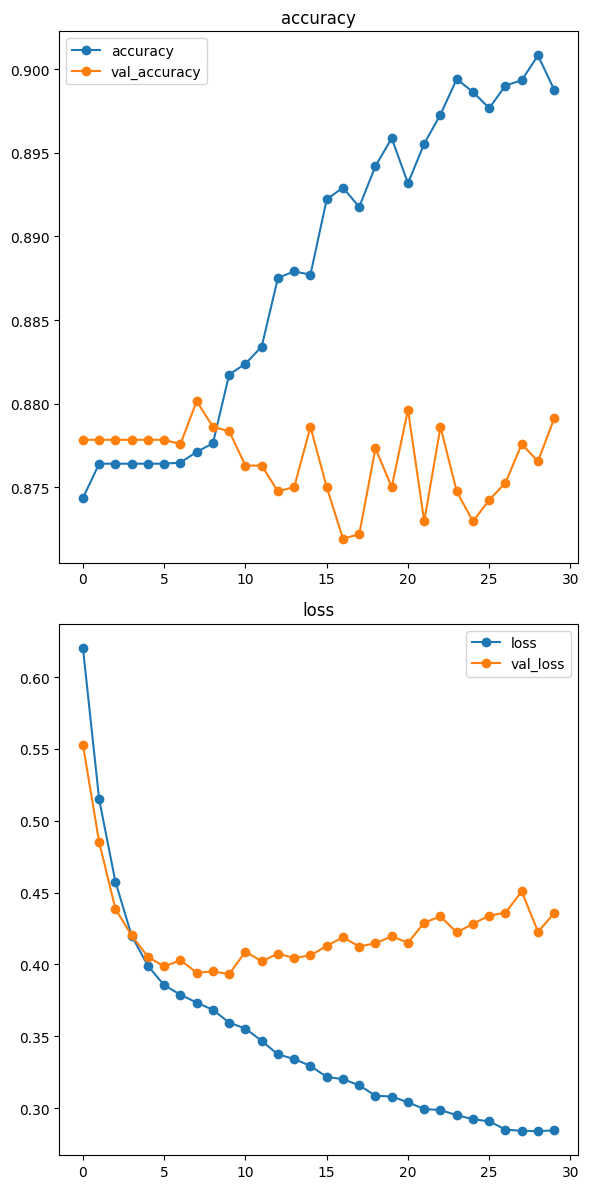

In [56]:
plot_history(history3)